# U.S. Medical Insurance Costs

## Module Imports

In [1]:
import csv
import json
from pprint import pprint
from decimal import Decimal
from matplotlib import pyplot as plt

## Data Import

In [2]:
insurance_data = []
with open("insurance.csv") as insurance_file:
    insurance_data_dict = csv.DictReader(insurance_file)
    for row in insurance_data_dict:
        insurance_data.append({
            "Age":int(row["age"]),
            "Sex":row["sex"],
            "BMI":float(row["bmi"]),
            "Children":int(row["children"]),
            "Smoker":row["smoker"],
            "Region":row["region"],
            "Cost":float(row["charges"])})
num_of_records_show = 5

print("There are {} records in the dataset.".format(len(insurance_data)))
print('The first {} records: {}'.format(num_of_records_show, insurance_data[:num_of_records_show]))

There are 1338 records in the dataset.
The first 5 records: [{'Age': 19, 'Sex': 'female', 'BMI': 27.9, 'Children': 0, 'Smoker': 'yes', 'Region': 'southwest', 'Cost': 16884.924}, {'Age': 18, 'Sex': 'male', 'BMI': 33.77, 'Children': 1, 'Smoker': 'no', 'Region': 'southeast', 'Cost': 1725.5523}, {'Age': 28, 'Sex': 'male', 'BMI': 33.0, 'Children': 3, 'Smoker': 'no', 'Region': 'southeast', 'Cost': 4449.462}, {'Age': 33, 'Sex': 'male', 'BMI': 22.705, 'Children': 0, 'Smoker': 'no', 'Region': 'northwest', 'Cost': 21984.47061}, {'Age': 32, 'Sex': 'male', 'BMI': 28.88, 'Children': 0, 'Smoker': 'no', 'Region': 'northwest', 'Cost': 3866.8552}]


## Function Definitions

In [3]:
def organise_by_group(data, group_by, groups):
    if type(groups) == tuple and len(groups) == 2:
        data_by_group = {}
        grouping1, grouping2 = groups
        group1 = []
        group2 = []
        for person in data:
            if person[group_by] == grouping1:
                group1.append(person)
            elif person[group_by] == grouping2:
                group2.append(person)
        data_by_group[grouping1] = group1
        data_by_group[grouping2] = group2
        return data_by_group
    else:
        print("Please enter 2 groups as a tuple")

In [4]:
def calculate_mean(data, measure, rounding = 2):
    total = 0
    data_points = 0
    for point in data:
        total += point[measure]
        data_points += 1
    mean_measure = total / data_points
    return round(mean_measure, rounding)

In [5]:
def get_unique(data, unique_area):
    unique_data = []
    for patient in data:
        if patient[unique_area] in unique_data:
            continue
        else:
            unique_data.append(patient[unique_area])
    return unique_data

In [6]:
def organise_by_area(data):
    areas = get_unique(data, "Region")
    data_by_area = {}
    for area in areas:
        area_patients = []
        for i in range(len(data)):
            if data[i]["Region"] == area:
                area_patients.append(data[i])
        data_by_area[area] = area_patients
    return data_by_area

In [7]:
def data_counter(data, counting, condition):
    counter = 0
    for i in range(len(data)):
        if data[i][counting] == condition:
            counter += 1
        else:
            continue
    return counter

In [8]:
def find_max(data, measure):
    max_measure = float("-inf")
    for patient in data:
        if measure in patient.keys():
            if patient[measure] > max_measure:
                max_measure = patient[measure]
        else:
            print("The {} was not found.".format(measure))
            break
    return max_measure

In [9]:
def find_min(data, measure):
    min_measure = float("inf")
    for patient in data:
        if measure in patient.keys():
            if patient[measure] < min_measure:
                min_measure = patient[measure]
        else:
            print("The {} was not found.".format(measure))
            break
    return min_measure

Calculating the predicted insurance cost using: insurance cost = 250 * age - 128 * sex (1 for male, 0 for female + 370 * bmi + 425 * num_of_children + 24000 * smoker (1 for smoker, 0 for non-smoker) - 12500

In [10]:
def insurance_prediction(patient):
    age = int(patient["Age"])
    bmi = float(patient["BMI"])
    children = int(patient["Children"])
    if patient["Sex"] == "male":
        sex = 1
    else:
        sex = 0
    if patient["Smoker"] == "yes":
        smoker = 1
    else:
        smoker = 0
    
    insurance_cost = 250 * age - 128 * sex + 370 * bmi + 425 * children + 24000 * smoker - 1250
    return round(insurance_cost, 2)
        
for person in insurance_data:
    person["Predicted Cost"] = insurance_prediction(person)
pprint(insurance_data[:3])

[{'Age': 19,
  'BMI': 27.9,
  'Children': 0,
  'Cost': 16884.924,
  'Predicted Cost': 37823.0,
  'Region': 'southwest',
  'Sex': 'female',
  'Smoker': 'yes'},
 {'Age': 18,
  'BMI': 33.77,
  'Children': 1,
  'Cost': 1725.5523,
  'Predicted Cost': 16041.9,
  'Region': 'southeast',
  'Sex': 'male',
  'Smoker': 'no'},
 {'Age': 28,
  'BMI': 33.0,
  'Children': 3,
  'Cost': 4449.462,
  'Predicted Cost': 19107.0,
  'Region': 'southeast',
  'Sex': 'male',
  'Smoker': 'no'}]


In [11]:
def plot_scatter(dataset, x_axis, y_axis, region_list = get_unique(insurance_data, "Region")):
    x_axis_data = []
    y_axis_data = []
    for person in dataset:
        if person["Region"] in region_list:
            x_axis_data.append(person[x_axis])
            y_axis_data.append(person[y_axis])
    print(len(x_axis_data), len(y_axis_data))
    plt.scatter(x_axis_data, y_axis_data)    

## Analysis

In [12]:
data_by_sex = organise_by_group(insurance_data, "Sex", ("male","female"))
males = data_by_sex["male"]
females = data_by_sex["female"]

data_by_smoking = organise_by_group(insurance_data, "Smoker", ("yes", "no"))

data_by_area = organise_by_area(insurance_data)

In [13]:
info = ["Age", "BMI", "Children", "Cost"]
for measure in info:
    minimum = find_min(insurance_data, measure)
    maximum = find_max(insurance_data, measure)
    print(
        "The minimum {measurement} in the dataset was {mini}. The maximum {measurement} in the dataset was {maxi}.".format(
            measurement = str(measure).lower(), mini = str(minimum).lower(), maxi = str(maximum).lower()))

The minimum age in the dataset was 18. The maximum age in the dataset was 64.
The minimum bmi in the dataset was 15.96. The maximum bmi in the dataset was 53.13.
The minimum children in the dataset was 0. The maximum children in the dataset was 5.
The minimum cost in the dataset was 1121.8739. The maximum cost in the dataset was 63770.42801.


### Male vs Female comparisons

In [14]:
male_count = len(males)
female_count = len(females)
print("There are {} males and {} females in the dataset.".format(male_count, female_count))

There are 676 males and 662 females in the dataset.


In [15]:
info = ["Age", "BMI", "Children", "Cost"]
for measure in info:
    mini_male = find_min(males, measure)
    max_male = find_max(males, measure)
    mini_female = find_min(females, measure)
    max_female = find_max(females, measure)
    print(
    "The minimum {measurement} for males was: {min_male} and females: {min_female}. The maximum {measurement} for males was: {max_male} and for females: {max_female}.".format(
    measurement = str(measure).lower(),
    min_male = str(mini_male).lower(),
    max_male = str(max_male).lower(),
    min_female = str(mini_female).lower(),
    max_female = str(max_female).lower()))

The minimum age for males was: 18 and females: 18. The maximum age for males was: 64 and for females: 64.
The minimum bmi for males was: 15.96 and females: 16.815. The maximum bmi for males was: 53.13 and for females: 48.07.
The minimum children for males was: 0 and females: 0. The maximum children for males was: 5 and for females: 5.
The minimum cost for males was: 1121.8739 and females: 1607.5101. The maximum cost for males was: 62592.87309 and for females: 63770.42801.


### Means

In [16]:
means_data = {
    "Age":{"Overall":None, "Sex":{}, "Area":{}, "Smoking Status":{}},
    "BMI":{"Overall":None, "Sex":{}, "Area":{}, "Smoking Status":{}},
    "Children":{"Overall":None, "Sex":{}, "Area":{}, "Smoking Status":{}},
    "Cost":{"Overall":None, "Sex":{}, "Area":{}, "Smoking Status":{}}
}

#### Age

In [17]:
mean_age = calculate_mean(insurance_data, "Age")
means_data["Age"]["Overall"] = mean_age

In [18]:
mean_male_age = calculate_mean(males, "Age")
mean_female_age = calculate_mean(females, "Age")
age_difference = round(mean_male_age - mean_female_age, 1)
print("""\
The mean age of patients in the dataset: {mean_age} years old.
The mean age of males in the dataset: {male_age} years old.
The mean age of females im the dataset: {female_age} years old.
The diffrence between male and female mean ages is {difference} years old.\
""".format(mean_age = mean_age, male_age = mean_male_age, female_age = mean_female_age, difference = age_difference))

means_data["Age"]["Sex"]["Male"] = mean_male_age
means_data["Age"]["Sex"]["Female"] = mean_female_age

The mean age of patients in the dataset: 39.21 years old.
The mean age of males in the dataset: 38.92 years old.
The mean age of females im the dataset: 39.5 years old.
The diffrence between male and female mean ages is -0.6 years old.


In [19]:
for area in get_unique(insurance_data, "Region"):
    means_data["Age"]["Area"][area] = calculate_mean(data_by_area[area], "Age")

In [20]:
for status in get_unique(insurance_data, "Smoker"):
    means_data["Age"]["Smoking Status"][status] = calculate_mean(data_by_smoking[status], "Age")

### BMI

In [21]:
mean_bmi = calculate_mean(insurance_data, "BMI")
means_data["BMI"]["Overall"] = mean_bmi

In [22]:
mean_male_bmi = calculate_mean(males, "BMI")
mean_female_bmi = calculate_mean(females, "BMI")
print("The mean BMI of patients in the dataset: {bmi} Kg/m2".format(bmi = mean_bmi))
means_data["BMI"]["Sex"]["Male"] = mean_male_bmi
means_data["BMI"]["Sex"]["Female"] = mean_female_bmi

The mean BMI of patients in the dataset: 30.66 Kg/m2


In [23]:
for area in get_unique(insurance_data, "Region"):
    means_data["BMI"]["Area"][area] = calculate_mean(data_by_area[area], "BMI")

In [24]:
for status in get_unique(insurance_data, "Smoker"):
    means_data["BMI"]["Smoking Status"][status] = calculate_mean(data_by_smoking[status], "BMI")

### Children

In [25]:
mean_children = calculate_mean(insurance_data, "Children", 0)
means_data["Children"]["Overall"] = int(mean_children)

In [26]:
mean_male_children = calculate_mean(males, "Children", 0)
mean_female_children = calculate_mean(females, "Children", 0)

means_data["Children"]["Sex"]["Male"] = int(mean_male_children)
means_data["Children"]["Sex"]["Female"] = int(mean_female_children)

In [27]:
for area in get_unique(insurance_data, "Region"):
    means_data["Children"]["Area"][area] = int(calculate_mean(data_by_area[area], "Children"))

In [28]:
for status in get_unique(insurance_data, "Smoker"):
    means_data["Children"]["Smoking Status"][status] = int(calculate_mean(data_by_smoking[status], "Children"))

### Insurance Cost

In [29]:
mean_cost = calculate_mean(insurance_data, "Cost", 2)
means_data["Cost"]["Overall"] = mean_cost

In [30]:
mean_male_cost = calculate_mean(males, "Cost", 2)
mean_female_cost = calculate_mean(females, "Cost", 2)

if mean_male_cost == mean_female_cost:
    print("On average, males and females pay the same amount for medical insurance")
elif mean_male_cost > mean_female_cost:
    cost_difference = mean_male_cost - mean_female_cost
    print("On average, males paid ${difference} dollars more than females".format(difference = cost_difference))
elif mean_male_cost < mean_female_cost:
    cost_difference = mean_female_cost - mean_male_cost
    print("On average, males paid ${difference} dollars less than females".format(difference = cost_diffrence))
    
means_data["Cost"]["Sex"]["Male"] = mean_male_cost
means_data["Cost"]["Sex"]["Female"] = mean_female_cost

On average, males paid $1387.17 dollars more than females


In [31]:
for area in get_unique(insurance_data, "Region"):
    means_data["Cost"]["Area"][area] = calculate_mean(data_by_area[area], "Cost")

In [32]:
for status in get_unique(insurance_data, "Smoker"):
    means_data["Cost"]["Smoking Status"][status] = calculate_mean(data_by_smoking[status], "Cost")

### Graphs

1338 1338


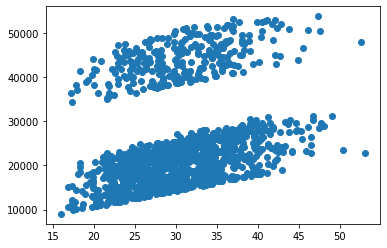

In [33]:
%matplotlib inline
plot_scatter(insurance_data, "BMI", "Predicted Cost")

274 274


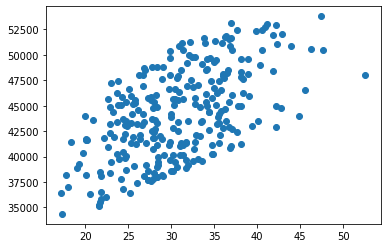

In [34]:
plot_scatter(data_by_smoking["yes"], "BMI", "Predicted Cost")

### Export

In [35]:
pprint(means_data)

{'Age': {'Area': {'northeast': 39.27,
                  'northwest': 39.2,
                  'southeast': 38.94,
                  'southwest': 39.46},
         'Overall': 39.21,
         'Sex': {'Female': 39.5, 'Male': 38.92},
         'Smoking Status': {'no': 39.39, 'yes': 38.51}},
 'BMI': {'Area': {'northeast': 29.17,
                  'northwest': 29.2,
                  'southeast': 33.36,
                  'southwest': 30.6},
         'Overall': 30.66,
         'Sex': {'Female': 30.38, 'Male': 30.94},
         'Smoking Status': {'no': 30.65, 'yes': 30.71}},
 'Children': {'Area': {'northeast': 1,
                       'northwest': 1,
                       'southeast': 1,
                       'southwest': 1},
              'Overall': 1,
              'Sex': {'Female': 1, 'Male': 1},
              'Smoking Status': {'no': 1, 'yes': 1}},
 'Cost': {'Area': {'northeast': 13406.38,
                   'northwest': 12417.58,
                   'southeast': 14735.41,
                  

In [36]:
with open("means.json", "w") as means_files:
    json.dump(means_data, means_files)

## Reports

In [37]:
mean_ages = means_data["Age"]
print('''\
The overall mean age of the patients in the dataset was: {overall} years old. The males and females in the dataset \
were {male} and {female} years old, respectively. The smokers and non-smokers in the dataset were {smoker} \
and {nonsmoker} years old, respectively. The mean ages by area were as follows: {sw} in Southwest, {se} in \
Southeast, {nw} in Northwest, and {ne} in Northeast.\
'''.format(
    overall = mean_ages["Overall"],
    male = mean_ages["Sex"]["Male"],
    female = mean_ages["Sex"]["Female"],
    smoker = mean_ages["Smoking Status"]["yes"],
    nonsmoker = mean_ages["Smoking Status"]["no"],
    sw = mean_ages["Area"]["southwest"],
    se = mean_ages["Area"]["southeast"],
    ne = mean_ages["Area"]["northwest"],
    nw = mean_ages["Area"]["northeast"]
))

The overall mean age of the patients in the dataset was: 39.21 years old. The males and females in the dataset were 38.92 and 39.5 years old, respectively. The smokers and non-smokers in the dataset were 38.51 and 39.39 years old, respectively. The mean ages by area were as follows: 39.46 in Southwest, 38.94 in Southeast, 39.27 in Northwest, and 39.2 in Northeast.


In [38]:
mean_bmis = means_data["BMI"]
print('''\
The overall mean BMI of the patients in the dataset was: {overall} kg/m2. The males and females had BMIs of {male} and {female} \
kg/m2, respectively. The smokers and non-smokers had BMIs of {smoker} and {nonsmoker} kg/m2, respectively. The mean BMIs by \
area were: {sw} in Southwest, {se} in Southeast, {nw} in Northwest, and {ne} in Northeast.\
'''.format(
    overall = mean_bmis["Overall"],
    male = mean_bmis["Sex"]["Male"],
    female = mean_bmis["Sex"]["Female"],
    smoker = mean_bmis["Smoking Status"]["yes"],
    nonsmoker = mean_bmis["Smoking Status"]["no"],
    sw = mean_bmis["Area"]["southwest"],
    se = mean_bmis["Area"]["southeast"],
    ne = mean_bmis["Area"]["northwest"],
    nw = mean_bmis["Area"]["northeast"]))


The overall mean BMI of the patients in the dataset was: 30.66 kg/m2. The males and females had BMIs of 30.94 and 30.38 kg/m2, respectively. The smokers and non-smokers had BMIs of 30.71 and 30.65 kg/m2, respectively. The mean BMIs by area were: 30.6 in Southwest, 33.36 in Southeast, 29.17 in Northwest, and 29.2 in Northeast.


In [39]:
mean_children = means_data["Children"]
print('''\
The overall mean number of children that the patients in the dataset had was: {overall}. The males and females had {male} \
and {female} kid(s), respectively. The smokers and non-smokers had {smoker} and {nonsmoker} kid(s), respectively. \
The mean number of kids by area were: {sw} in Southwest, {se} in Southeast, {nw} in Northwest, and {ne} in Northeast.\
'''.format(
    overall = mean_children["Overall"],
    male = mean_children["Sex"]["Male"],
    female = mean_children["Sex"]["Female"],
    smoker = mean_children["Smoking Status"]["yes"],
    nonsmoker = mean_children["Smoking Status"]["no"],
    sw = mean_children["Area"]["southwest"],
    se = mean_children["Area"]["southeast"],
    ne = mean_children["Area"]["northwest"],
    nw = mean_children["Area"]["northeast"]))

The overall mean number of children that the patients in the dataset had was: 1. The males and females had 1 and 1 kid(s), respectively. The smokers and non-smokers had 1 and 1 kid(s), respectively. The mean number of kids by area were: 1 in Southwest, 1 in Southeast, 1 in Northwest, and 1 in Northeast.


In [40]:
mean_costs = means_data["Cost"]
print('''\
The overall mean insurance cost in the dataset was ${overall}. The males and females paid ${male} and ${female}, respectively. \
The smokers and non-smokers paid, on average, ${smoker} and ${nonsmoker}, respectively. The mean insurance costs by area were: \
${sw} in Southwest, ${se} in Southeast, ${nw} in Northwest, and ${ne} in Northeast.\
'''.format(
    overall = mean_costs["Overall"],
    male = mean_costs["Sex"]["Male"],
    female = mean_costs["Sex"]["Female"],
    smoker = mean_costs["Smoking Status"]["yes"],
    nonsmoker = mean_costs["Smoking Status"]["no"],
    sw = mean_costs["Area"]["southwest"],
    se = mean_costs["Area"]["southeast"],
    ne = mean_costs["Area"]["northwest"],
    nw = mean_costs["Area"]["northeast"]))

The overall mean insurance cost in the dataset was $13270.42. The males and females paid $13956.75 and $12569.58, respectively. The smokers and non-smokers paid, on average, $32050.23 and $8434.27, respectively. The mean insurance costs by area were: $12346.94 in Southwest, $14735.41 in Southeast, $13406.38 in Northwest, and $12417.58 in Northeast.
